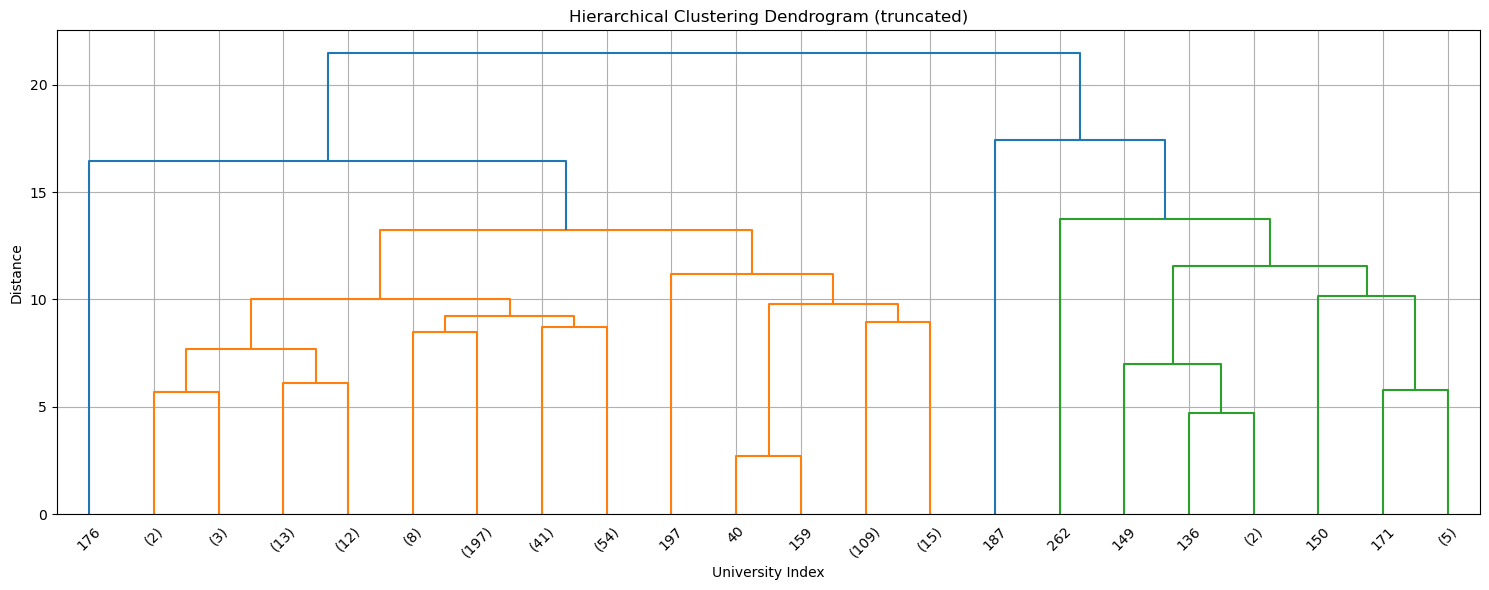

✅ Number of complete records used: 471
✅ Number of numerical columns used: 17


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/anirudhravipudi/Desktop/AI/Projects/Universities.csv")

df_clean = df.dropna()

numerical_cols = df_clean.select_dtypes(include=['float64']).columns
df_numeric = df_clean[numerical_cols]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

linked = linkage(df_scaled, method='complete', metric='euclidean')

plt.figure(figsize=(15, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('University Index')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Number of complete records used:", df_clean.shape[0])
print("✅ Number of numerical columns used:", len(numerical_cols))

In [7]:
from scipy.cluster.hierarchy import fcluster

cluster_labels = fcluster(linked, t=4, criterion='maxclust')

df_clustered = df_clean.copy()
df_clustered['Cluster'] = cluster_labels

cluster_summary = df_clustered.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

print("\nCluster Sizes:")
print(df_clustered['Cluster'].value_counts().sort_index())

         Public (1)/ Private (2)  # appli. rec'd  # appl. accepted  \
Cluster                                                              
1                       1.739606     2752.124726       1793.078775   
2                       2.000000      601.000000        396.000000   
3                       1.333333    17750.333333      12118.500000   
4                       1.000000    11054.000000       6397.000000   

         # new stud. enrolled  % new stud. from top 10%  \
Cluster                                                   
1                  684.503282                 27.868709   
2                  203.000000                  1.000000   
3                 4263.916667                 35.916667   
4                 3524.000000                 26.000000   

         % new stud. from top 25%  # FT undergrad  # PT undergrad  \
Cluster                                                             
1                       55.347921     3084.415755      684.842451   
2                

In [18]:
public_private_counts = df_clustered.groupby(['Cluster', 'Public (1)/ Private (2)']).size().unstack()
print(" Public/Private by Cluster:")
print(public_private_counts)

print("\n Top States in Each Cluster:")
for cluster_id in sorted(df_clustered['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    top_states = df_clustered[df_clustered['Cluster'] ==cluster_id]['State'].value_counts().head(10)
    print(top_states)

 Public/Private by Cluster:
Public (1)/ Private (2)      1      2
Cluster                              
1                        119.0  338.0
2                          NaN    1.0
3                          8.0    4.0
4                          1.0    NaN

 Top States in Each Cluster:

Cluster 1:
State
PA    41
NY    37
OH    24
NC    23
MA    19
TX    18
IA    18
MO    15
IN    15
VA    15
Name: count, dtype: int64

Cluster 2:
State
MI    1
Name: count, dtype: int64

Cluster 3:
State
MA    3
TX    2
AZ    1
CA    1
IL    1
MI    1
NJ    1
NY    1
PA    1
Name: count, dtype: int64

Cluster 4:
State
MN    1
Name: count, dtype: int64


In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean

df = pd.read_csv("/Users/anirudhravipudi/Desktop/AI/Projects/Universities.csv")

tufts_row = df[df['College Name'].str.contains("Tufts", case=False, na=False)].copy()
print("Tufts University Entry:")
display(tufts_row)

tufts_valid_cols = tufts_row.drop(columns=['College Name', 'State']).dropna(axis=1).columns.tolist()

common_cols = [col for col in tufts_valid_cols if col in df_clustered.columns]
tufts_values = tufts_row[common_cols].values.flatten()

cluster_centroids = df_clustered.groupby('Cluster')[common_cols].mean()
distances = cluster_centroids.apply(lambda row: euclidean(row.values, tufts_values), axis=1)

closest_cluster = distances.idxmin()
print(f"\n Closest cluster to Tufts University is: Cluster {closest_cluster}")

missing_cols = tufts_row.columns[tufts_row.isnull().any()].tolist()
imputed_values = df_clustered[df_clustered['Cluster'] == closest_cluster][missing_cols].mean(numeric_only=True)

print("\n Imputed Values for Tufts (from Cluster Average):")
display(imputed_values)

Tufts University Entry:


,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
475,Tufts University,MA,2,7614.0,3605.0,1205.0,60.0,90.0,4598.0,NaN,19701.0,19701.0,3038.0,2930.0,503.0,600.0,928.0,99.0,10.3,92.0



 Closest cluster to Tufts University is: Cluster 1

 Imputed Values for Tufts (from Cluster Average):


# PT undergrad    684.842451
dtype: float64